### Autor: Fernando Ordinola

# Preliminares

><b>Formulación del problema:</b> La escuela está buscando una forma más efectiva de identificar a los estudiantes que pueden tener malos resultados durante un período educativo. También quiere tener en cuenta los atributos predictores que más afectan a una mala calificación para tomar medidas preventivas en los casos relevantes. Sin embargo, esto es complicado de hacer con un gran número de estudiantes y la falta de modelos algorítmicos que simplifiquen el proceso.
<br>
<br>
><b>Objetivo principal:</b> de este proyecto es desarrollar modelos descriptivos que permitan identificar predictores significativos y crear un modelo predictivo que permita estimar el promedio final de un estudiante.
<br>
<br>
><b>Objetivos especificos:</b>
><ul>
><li>Procesar la data disponible para ser usada en entrenamiento de un algoritmo regresivo.</li>
><li>Dividir el dataset para entrenamiento </li>
><li>Ejecutar pruebas de hipótesis para validar predictores significativos</li>
></ul>
<br>
><b> Implementación del modelo:</b> Se hará uso de un modelo de regresión lineal, ya que nuestro vector objetivo es de carácter continuo y dependiente, como son las calificaciones de un estudiante que pueden tomar valores no enteros, dependiendo de una serie de otros atributos independientes o también conocidos como predictores.
<br>
<br>
><b>Métricas de desempeño:</b>
><ul>
><li>Error cuadrático medio</li>
><li>Error medio absoluto</li>
><li>R cuadrado</li>
><li>P valores de los coeficientes</li>
><li>P valores de prueba general del modelo</li>
></ul>

# Aspectos Computacionales

> Librerías a utilizar
><li>pandas</li>
><li>numpy</li>
><li>matplotlib</li>
><li>statsmodel</li>
><li>seaborn</li>
><li>warnings</li>
><li>sklearn</li>

>Modulo propio con funciones utilitarias: functions.py

# Descripción

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as pyfunc
import warnings
import scipy.stats as stats

import statsmodels.formula.api as smf

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('students.csv', delimiter='|').drop('Unnamed: 0', axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""20""",U,LE3,A,2,2,services,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,MS,M,"""17""",U,LE3,T,3,1,services,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,MS,M,"""21""",R,GT3,T,1,1,other,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,MS,M,"""18""",R,LE3,T,3,2,services,other,...,4,4,"""1""",3,4,"""5""",0,11,12,10


In [3]:
for col in df:
    try:
        #Se remplaza los datos formato texto incorrectos a valores nulos.
        df[col] = df[col].replace(['zero', 'nulidade', 'sem validade'], np.nan)
        #Se quita el caracter adicional de quatotion marks "" de los datos para luego ser transformados a númerico.
        df[col] = pd.to_numeric(df[col].str.replace('"', ''), errors='ignore') 
        
    except:
        print('Columna ya preformateada como int:', col)

Columna ya preformateada como int: G2


In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,NaN,8,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10,10.0


In [5]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                391 non-null    float64
 1   Medu               392 non-null    float64
 2   Fedu               390 non-null    float64
 3   traveltime         392 non-null    float64
 4   studytime          390 non-null    float64
 5   failures           390 non-null    float64
 6   famrel             390 non-null    float64
 7   freetime           393 non-null    float64
 8   goout              390 non-null    float64
 9   Dalc               392 non-null    float64
 10  Walc               390 non-null    float64
 11  health             391 non-null    float64
 12  absences           391 non-null    float64
 13  G1                 391 non-null    float64
 14  G2                 395 non-null    int64  
 15  G3                 392 non-null    float64
 16  school_MS          395 non

In [7]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,NaN,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1,0,1,0,0,0,1,1,0,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,0,0,1,0,0,0,1,1,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1,0,1,0,1,0,1,1,1,0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,1,0,0,1,1,1,1,1,1,1
4,NaN,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,0,0,1,1,0,1,1,0,0


### Inspección de datos perdidos

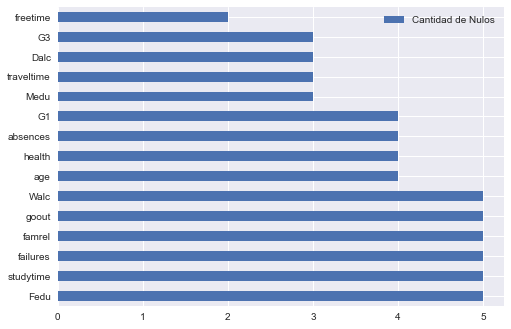

In [8]:
pyfunc.plot_nas(df)

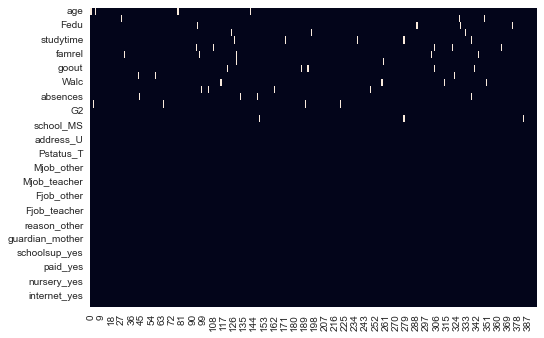

In [9]:
sns.heatmap(df.isnull().transpose(), cbar=False, cbar_kws={'label': 'Missing Data'});

In [10]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

56

In [11]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) / len(df)

0.14177215189873418

In [12]:
df.dropna(inplace=True)

### Inspección del vector objetivo

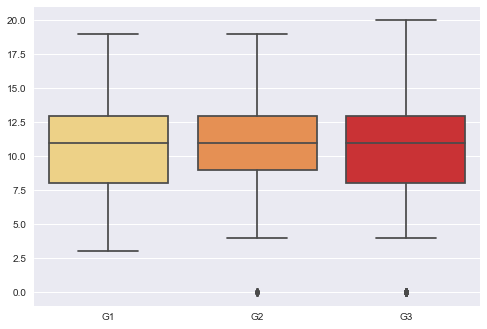

In [13]:
sns.boxplot(data=df[['G1', 'G2', 'G3']], palette="YlOrRd");

Outliers en G2 pueden explicar alumnos que no rindieron exámenes o desertaron del proceso escolar

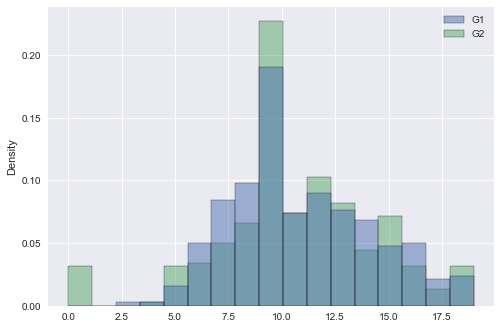

In [14]:
sns.histplot(data=df[['G1','G2']], stat='density', common_norm=False);

Es importante mencionar los datos de G2 con notas cercanas a 0, lo que lleva a la conclusión de que hay deserción entre los estudiantes.

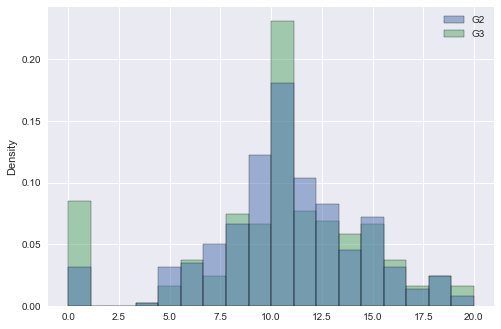

In [15]:
sns.histplot(data=df[['G2','G3']], stat='density', common_norm=False);

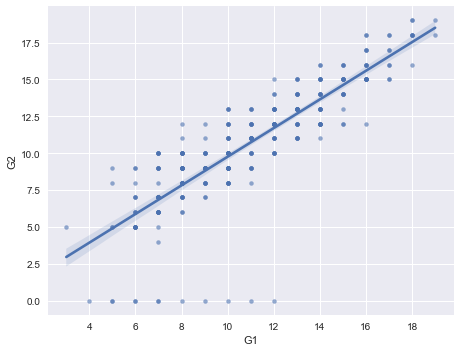

In [16]:
sns.lmplot(data=df, x="G1", y="G2", aspect=1.3, scatter_kws={"s": 20, 'alpha':.6});

Se puede observar que hay estudiantes que rindieron exámenes durante el primer semestre, pero durante el segundo, obtuvieron nota 0. Por otra parte, se puede ver una tendencia hacia que los estudiantes tengan promedios cercanos o similares a los que obtuvieron en el primer período.

### Inspección visual de variables

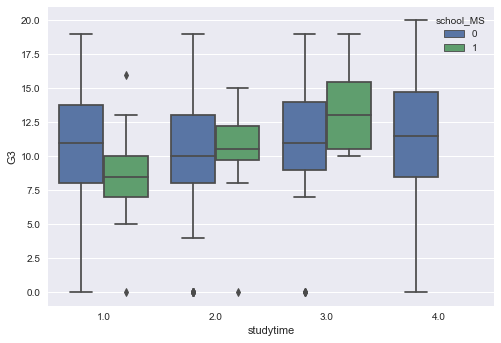

In [17]:
sns.boxplot(data=df, x="studytime", y="G3", hue="school_MS");

A mayor tiempo de estudio, los estudiantes del colegio Mousinho da Silveira tienden a incrementar su promedio final, mientras que los estudiantes del colegio Gabriel Pereira parecen no ver mucha diferencia al aumentar el tiempo de estudio.

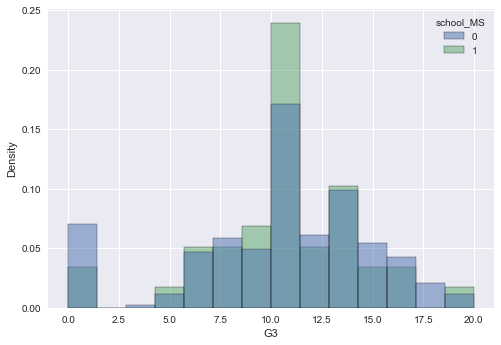

In [18]:
sns.histplot(data=df, x='G3', hue='school_MS', stat='density', common_norm=False);

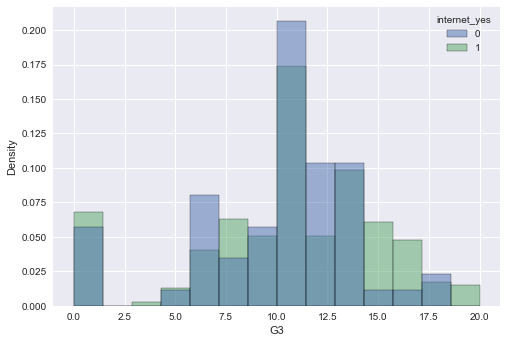

In [19]:
sns.histplot(data=df, x='G3', hue="internet_yes", stat='density', common_norm=False);

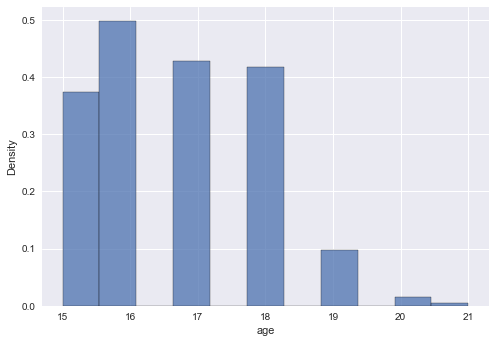

In [20]:
sns.histplot(data=df, x='age', stat='density', common_norm=False);

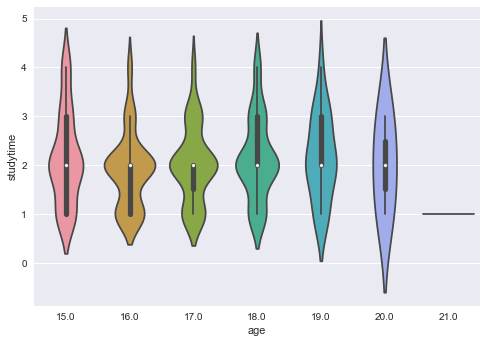

In [21]:
sns.violinplot(data=df, x="age", y="studytime");

Dado el gráfico de distribución de edades, se justifica en este gráfico de violin que en las edades de 20 a 22 se pierde una continuidad en la distribución del tiempo de estudio en los estudiantes. El modelo podría aprender mejor a predecir o describir el vector objetivo para las edades más jóvenes.

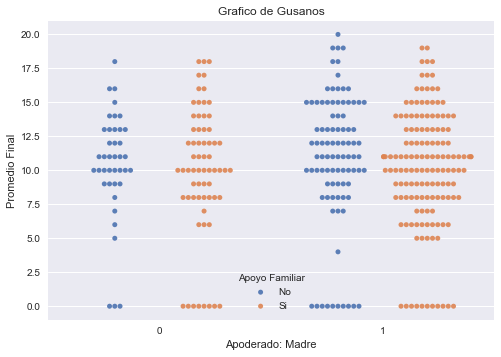

In [22]:
swarmp_plot = sns.swarmplot(data=df, y="G3", x="guardian_mother", hue='famsup_yes' ,alpha=.9, palette="deep", dodge=True);
plt.legend(title='Apoyo Familiar', labels=['No', 'Si']);
swarmp_plot.set(xlabel ="Apoderado: Madre", ylabel = "Promedio Final", title ='Grafico de Gusanos');

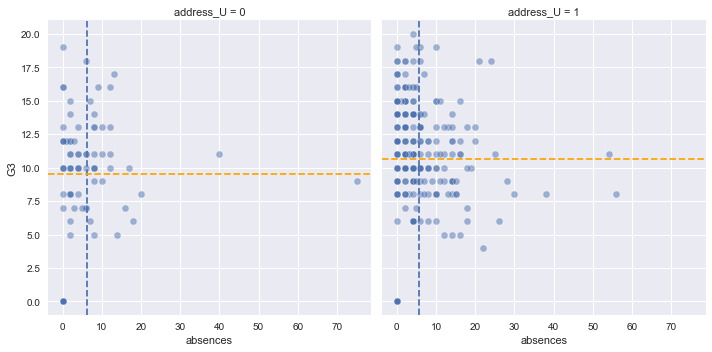

In [23]:
pyfunc.custom_relplot(df, 'absences', 'G3', 'address_U')

La media del promedio final es ligeramente superior en zonas urbanas. Por otra parte, los niños de origen rural con altos promedios parecen ausentarse por encima de la media, mientras que en zonas urbanas se concentran más por debajo de la media de ausencias. También es importante mencionar que los mayores valores de ausencias tienden a concentrarse en la media del promedio.

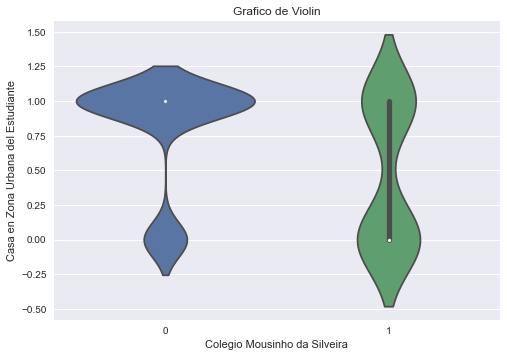

In [24]:
vio_school_address = sns.violinplot(data=df, x="school_MS", y="address_U");
vio_school_address.set(xlabel ="Colegio Mousinho da Silveira", ylabel = "Casa en Zona Urbana del Estudiante", 
                       title ='Grafico de Violin');

El conjunto de datos contiene una distribución equitativa entre los estudiantes de la escuela Mousinho da Silveira que son de origen urbano o rural. En cambio, la gran mayoría de los estudiantes del colegio Gabriel Pereira se ubican en zonas urbanas.

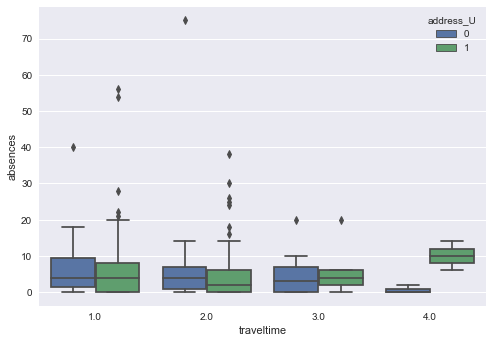

In [25]:
sns.boxplot(data=df, x="traveltime", y="absences", hue="address_U");

Se puede observar que los estudiantes de zonas urbanas tienen más valores atípicos que los de zonas rurales.

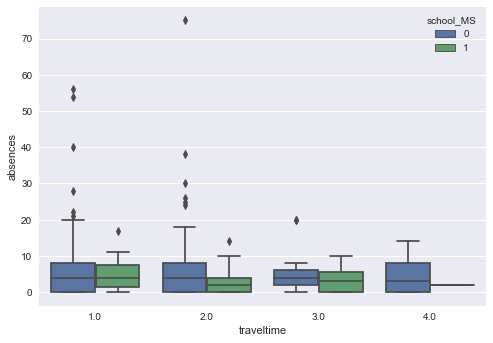

In [26]:
sns.boxplot(data=df, x="traveltime", y="absences", hue="school_MS");

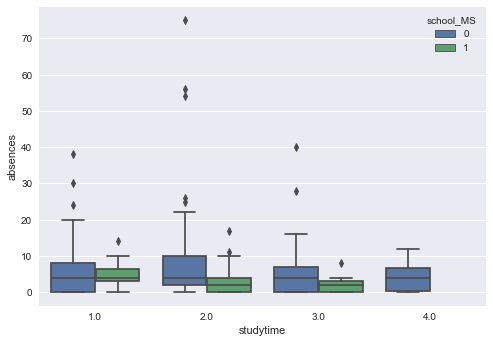

In [27]:
sns.boxplot(data=df, x="studytime", y="absences", hue="school_MS");

# Extracción de factores latentes

In [28]:
import factor_analyzer as fact

In [29]:
df_f_h = df[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']]

In [30]:
fact.calculate_bartlett_sphericity(df_f_h)

(298.3976585443869, 5.7555142306803155e-55)

Dado que en este caso tenemos un p-valor de 0, el test de Barlett sugiere que la hipótesis nula ha sido rechazada con un alto grado de confianza. Esto significa que es muy probable que exista una fuerte relación entre las variables en el conjunto de datos dado.

In [31]:
fact.calculate_kmo(df_f_h)[0]

array([0.50005134, 0.61163933, 0.6328481 , 0.59114607, 0.56116716,
       0.58045622])

Observamos que no hay valores KMO cercanos a 0, lo cual puede indicar que los datos entregados pueden ser adecuados para el análisis factorial.

In [32]:
#Generamos una nueva instancia en el objeto factorize
factorize = fact.FactorAnalyzer(n_factors=2, rotation='varimax')
# Implementamos el análisis de factores
factorize.fit(df_f_h)
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]

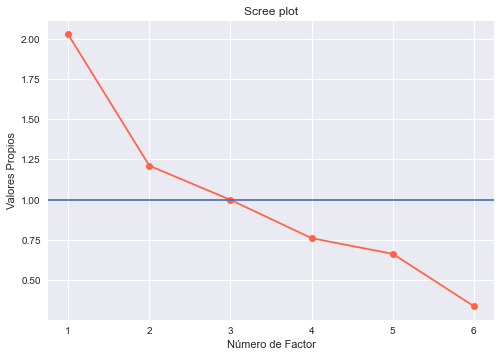

In [33]:
pyfunc.scree_plot(factor_screeplot) #Podemos ver, según nuestro gráfico, que son extraíbles 2 factores por estar sobre 1.

In [34]:
loadings_df = pd.DataFrame(factorize.loadings_, columns=['Factor1', 'Factor2'], index=df_f_h.columns)

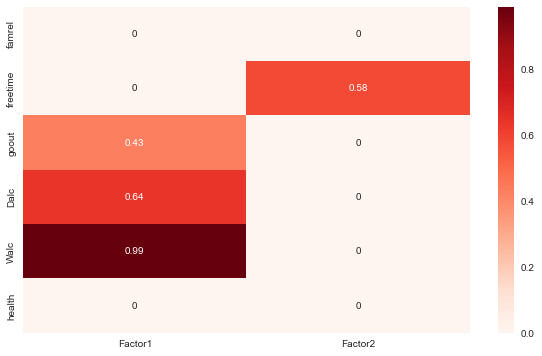

In [35]:
plt.figure(figsize=(10,6))
factor_loadings = loadings_df.applymap(lambda x: np.where(x < .4, 0, round(x,2)))
sns.heatmap(factor_loadings, cmap ='Reds', annot= True);

Podemos observar que el primer factor agrupa a las variables Walc, Dalc y goout, que hacen referencia a estudiantes que beben en los fines de semana y días de semana y que salen con frecuencia. Por lo tanto, el factor 1 agruparía a estos individuos que tienen estas características similares en común.

Por otra parte, el factor 2 solo considera una variable con correlación y no tendría mucho sentido utilizarla ya que no se cumple el objetivo de reducir la dimensionalidad.

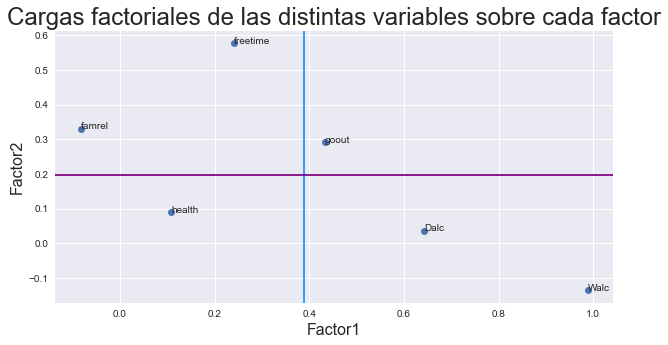

In [36]:
pyfunc.plot_double_loadings(loadings_df)

In [37]:
scores = factorize.transform(df_f_h)
scores_df = pd.DataFrame(scores, columns=['factor_1', 'factor_2'])

In [38]:
df.reset_index(drop=True, inplace=True)
df['drinkers_gout'] = scores_df['factor_1'] #se agregó los scores del factor 1 al dataframe.

# Modelación descriptiva

Se creó la función *get_best_model_OLS* para iterar sobre el modelo hasta encontrar uno con todas las variables independientes por debajo del p-valor indicado, en este caso de 0.05. Esta función también reporta algunas métricas relevantes para medir la calidad predictiva del modelo.

Parámetros de la función: <br>
dataframe, variable dependiente, array con las variables a excluir del modelo, p-valor exigido.

### Primera variable para modelo descriptivo: G1

In [39]:
G1_model = pyfunc.get_best_model_OLS(df, 'G1', ['G1', 'G2', 'G3'], 0.05)
G1_model.summary()

-Modelo 1- Adj. R-Squared: 0.252026, BIC: 1865.48, AIC: 1712.44, F-Stadistics: 3.92
-Modelo 1- Adj. R-Squared: 0.214239, BIC: 1739.82, AIC: 1701.56, F-Stadistics: 11.24, Qty-Deleted-Vars: 31
-Modelo 1- Adj. R-Squared: 0.208603, BIC: 1727.84, AIC: 1701.06, F-Stadistics: 15.85, Qty-Deleted-Vars: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     15.85
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           5.04e-16
Time:                        19:30:59   Log-Likelihood:                -843.53
No. Observations:                 339   AIC:                             1701.
Df Residuals:                     332   BIC:                             1728.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.1354      0.865     12.877      0.000       9.434      12.837
studytime         0.4662      0.198      2.352      0.019       0.076       0.856
failures         -1.3114      0.235     -5.569      0.000      -1.775      -0.848
goout            -0.4436      0.147     -3.013      0.003      -0.733      -0.154
schoolsup_yes    -1.9389      0.478     -4.057      0.000      -2.879      -0.999
famsup_yes       -0.8817      0.336     -2.625      0.009      -1.542      -0.221
higher_yes        1.5078      0.664      2.270      0.024       0.201       2.814
==============================================================================
Omnibus:                        8.464   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.545
Skew:                           0.160   Prob(JB):                       0.0625
Kurtosis:                       2.462   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Interpretación
>>Como se puede ver, quedó un modelo con solo variables con p-valores menores a 0.05 y con t-values relevantes que muestran una fuerte relación entre las variables independientes y la dependiente. Todos estos t-values están alejados del valor 0.

>>Por otra parte, durante la iteración se eliminaron variables que tenían t-values que rondaban en 1 o -1 o que contaban con p-valores cercanos a 0.2. Esto baja la calificación de R-squared y Adj. R-squared. Sin embargo, consideramos que un t-value de 1 o -1 es una relación moderada y no relevante, especialmente considerando que contaban con p-valores altos.

>> La calidad del modelo se incrementó, como se puede ver reflejado en BIC, AIC y F-estadísticas.

### Segunda variable para modelo descriptivo: G2

In [40]:
G2_model = pyfunc.get_best_model_OLS(df, 'G2', ['G2', 'G3'], 0.05)
G2_model.summary()

-Modelo 1- Adj. R-Squared: 0.752591, BIC: 1585.18, AIC: 1428.31, F-Stadistics: 26.7
-Modelo 1- Adj. R-Squared: 0.742082, BIC: 1433.01, AIC: 1410.06, F-Stadistics: 195.5, Qty-Deleted-Vars: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     195.5
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           9.07e-97
Time:                        19:30:59   Log-Likelihood:                -699.03
No. Observations:                 339   AIC:                             1410.
Df Residuals:                     333   BIC:                             1433.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4175      0.474      0.882      0.379      -0.514       1.349
traveltime      -0.3950      0.153     -2.576      0.010      -0.697      -0.093
G1               0.9706      0.032     30.327      0.000       0.908       1.034
Mjob_other       0.4903      0.222      2.210      0.028       0.054       0.927
paid_yes         0.6197      0.212      2.927      0.004       0.203       1.036
romantic_yes    -0.7188      0.222     -3.233      0.001      -1.156      -0.282
==============================================================================
Omnibus:                      146.938   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.669
Skew:                          -1.720   Prob(JB):                    7.78e-188
Kurtosis:                      10.012   Cond. No.                         54.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tercera variable para modelo descriptivo: G3

In [41]:
G3_model = pyfunc.get_best_model_OLS(df, 'G3', ['G3'], 0.05)
G3_model.summary()

-Modelo 1- Adj. R-Squared: 0.835219, BIC: 1579.46, AIC: 1418.77, F-Stadistics: 42.79
-Modelo 1- Adj. R-Squared: 0.83441, BIC: 1405.36, AIC: 1386.23, F-Stadistics: 426.8, Qty-Deleted-Vars: 38


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          7.30e-130
Time:                        19:30:59   Log-Likelihood:                -688.12
No. Observations:                 339   AIC:                             1386.
Df Residuals:                     334   BIC:                             1405.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1850      0.569     -5.596      0.000      -4.305      -2.065
famrel         0.2927      0.113      2.590      0.010       0.070       0.515
absences       0.0334      0.012      2.733      0.007       0.009       0.058
G1             0.1662      0.058      2.864      0.004       0.052       0.280
G2             0.9758      0.051     19.204      0.000       0.876       1.076
==============================================================================
Omnibus:                      208.077   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1477.119
Skew:                          -2.583   Prob(JB):                         0.00
Kurtosis:                      11.825   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparando los 3 modelos descriptivos realizados

Se utilizó esta función propia para comparar las métricas de los modelos de manera más cómoda sin tener que hacer scroll en el notebook.

In [42]:
pyfunc.compare_structure(G1_model, G2_model, G3_model)

,Model,R-squared,Adj. R-Squared,Log-Likelihood,F-Stadistics,BIC,AIC,mse_model,mse_total
0,G1_model,0.222651,0.208603,-843.530587,15.848807,1727.843175,1701.061174,137.368063,10.952034
1,G2_model,0.745897,0.742082,-699.029435,195.498715,1433.014871,1410.058870,720.252482,14.284303
2,G3_model,0.836370,0.834410,-688.116733,426.797180,1405.363467,1386.233466,1469.939763,20.799096


>A medida que los modelos incluyen las variables G1 o G2, su calidad aumenta. El primer modelo, que no incluye ninguna variable de calificaciones de exámenes, tiene el peor rendimiento.

>El último modelo que incluye las variables G1 y G2 siempre tendrá mejor rendimiento.

>Como podemos notar a través de la realización de los modelos, el factor latente o los puntajes del factor 1 que se agregaron al conjunto de datos no se utilizaron ya que fueron descartados en la iteración debido a tener un p-valor mayor a 0.05, por lo que no fueron considerados en el grupo de predictores con alta significancia estadística.

# Modelación Predictiva

In [43]:
def report_scores(predicted_values, y_test):
    mse = mean_squared_error(y_test, predicted_values).round(1)
    r2 = r2_score(y_test, predicted_values).round(2)
    return print(f'Error cuadrático promedio: {mse}, R cuadrado: {r2}')

In [44]:
y_vec = df.loc[:, 'G3']
X_mat = df.loc[:, G3_model.params.keys().drop('Intercept')] 
#Se pasa la data con variables que mostraron significancia estadística en el modelo descriptivo.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=12565)
new_model = linear_model.LinearRegression(fit_intercept=True)
new_model.fit(X_train.values, y_train.values)
new_model_yhat = new_model.predict(X_test.values)

report_scores(new_model_yhat, y_test)

Error cuadrático promedio: 3.7, R cuadrado: 0.81


El modelo tiene una diferencia promedio de <b>3.7</b> entre sus predicciones y los valores reales. Esto es un indicador de la precisión del modelo.

Un <b>R-cuadrado de 0.81</b> en nuestro modelo indica que explica el 81% de la variabilidad en los datos observados.

## Modelo predictivo para G3 solo dejando G1 y las otras variables independientes.

Dado que sería más lógico intentar predecir G3 antes de tener G1 y G2, se hizo este modelo solo utilizando G1 para analizar sus resultados.

In [46]:
y_vec_2 = df.loc[:, 'G3']
X_mat_2 = df.loc[:, G3_model.params.keys().drop(['Intercept', 'G2'])] 
#Se pasa la data con variables que mostraron significancia estadística en el modelo descriptivo.

In [47]:
X_mat_2.head(5)

,famrel,absences,G1
0,5.0,4.0,5.0
1,3.0,2.0,15.0
2,5.0,10.0,15.0
3,4.0,0.0,12.0
4,4.0,6.0,6.0


In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mat_2, y_vec_2, test_size=.33, random_state=12565)
new_model_2 = linear_model.LinearRegression(fit_intercept=True)
new_model_2.fit(X_train_2.values, y_train_2.values)
new_model_yhat_2 = new_model_2.predict(X_test_2.values)

report_scores(new_model_yhat_2, y_test_2)

Error cuadrático promedio: 7.6, R cuadrado: 0.6


El modelo tiene una diferencia promedio de <b>7,6</b> entre sus predicciones y los valores reales. Esto es un indicador de la precisión del modelo.

Un <b>R-cuadrado de 0.60</b> en nuestro modelo indica que explica el 60% de la variabilidad en los datos observados.

Es natural que el rendimiento del modelo predictivo para G3 disminuya al eliminar G2.



